In [ ]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


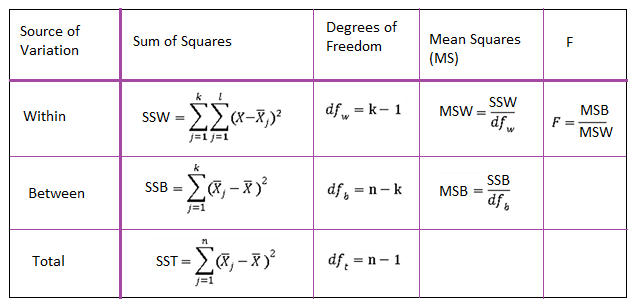

In [ ]:
from IPython.display import Image
Image("var_analysis.png")

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


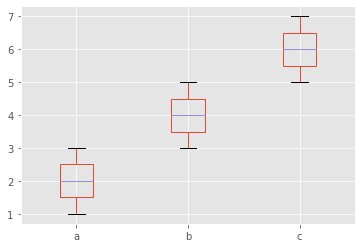

In [ ]:
# Выборки которые надо сравнить
data =\
    pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

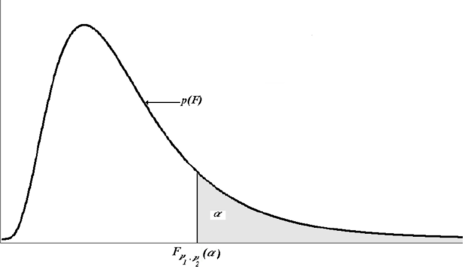

In [ ]:
# Распределение F-значения
Image('fisher_dist.png')

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [ ]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976,
             0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

# почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [ ]:
from numpy import random
from scipy.stats import t

def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2) /
                              N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

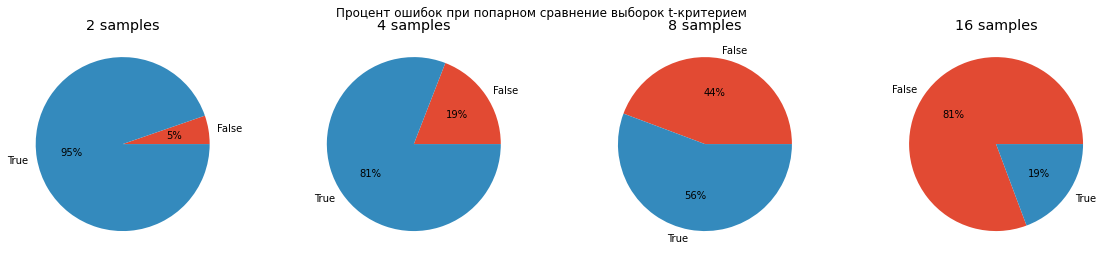

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f'{n} samples')
    

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

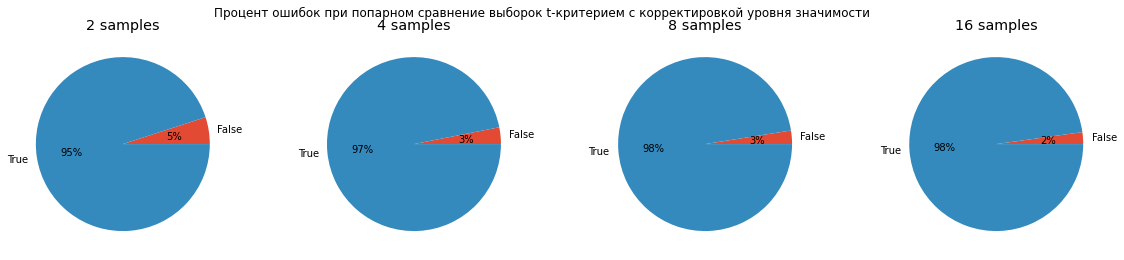

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2) # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони 
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


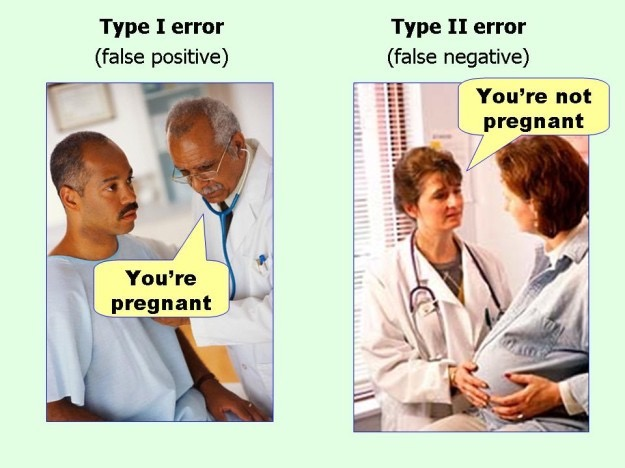

In [ ]:
Image('error_types.jpeg')


# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

H0 Группы людей принимающих препарат не различаются

H1 Группы людей принимающих препарат различаются

In [ ]:
t_test, p = stats.ttest_ind(A,B)
print(f'статистика = {t_test} , p = {p}')
if p < 0.001:
  print("Верна альтернативная гипотиза. Группы людей принимающих препарат различаются")
else:
  print("Верна нулевая гипотиза. Группы людей принимающих препарат не различаются")


статистика = -1.733800647210997 , p = 0.08451003973499756
Верна нулевая гипотиза. Группы людей принимающих препарат не различаются


Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

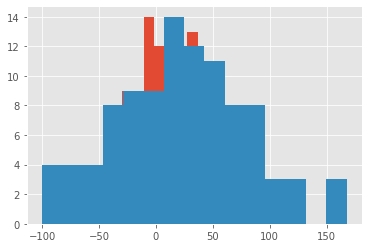

In [ ]:
plt.hist(A, bins = 15)
plt.hist(B, bins = 15)
stats.ttest_ind(A,B)

In [ ]:
plot = A,B

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

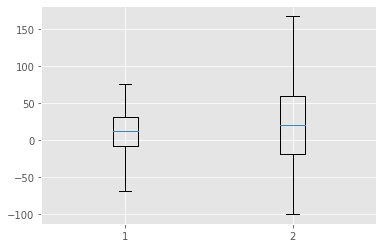

In [ ]:
plt.boxplot(plot)
stats.ttest_ind(A,B)

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

H0 Группы людей принимающих препарат не различаются от групп людей не принимающих препарат

H1 Группы людей принимающих препарат различаются от групп людей не принимающих препарат

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [ ]:
w_test, p = stats.wilcoxon(A,B)
print(f'Статистика = {w_test} , p = {p}')
if p < 0.001:
  print("Верна альтернативная гипотиза. Группы различаются")
else:
  print("Верна нулевая гипотиза. Группы не различаются")

Статистика = 1930.0 , p = 0.04077572901549266
Верна нулевая гипотиза. Группы не различаются


WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

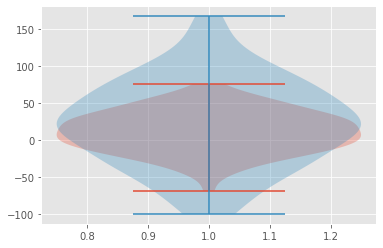

In [ ]:
plt.violinplot(A)
plt.violinplot(B)
stats.wilcoxon(A,B)

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [ ]:
fvalue, pvalue = stats.f_oneway(water,nutri,mineral)
print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=12.526, p=0.000029
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
boxplot = water, nutri, mineral

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a504f5f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a504fcc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a50894c10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8a50501750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a50501c90>,
 'means': []}

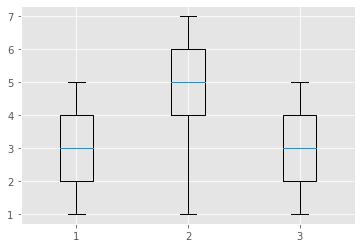

In [ ]:
plt.boxplot(boxplot)

**Судя по графику боксплот, замечаем, что эффект от полива водой и минералкой одинаковый, а от полива удобрением отличается**

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



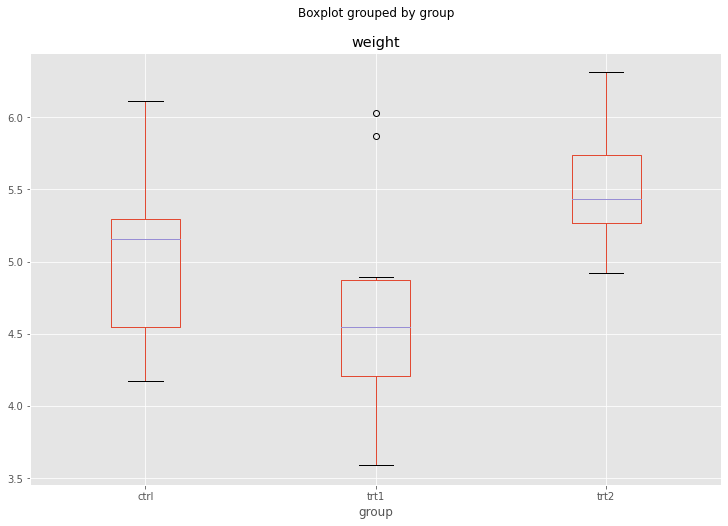

In [ ]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


**Подготавливаем данные**

In [ ]:
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   weight      30 non-null     float64
 2   group       30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [ ]:
data.describe()

,Unnamed: 0,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [ ]:
data['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [ ]:
data_ctrl = data[data['group'] == 'ctrl']
data_ctrl = data_ctrl['weight']

In [ ]:
data_ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [ ]:
data_trt1 = data[data['group'] == 'trt1']
data_trt1 = data_trt1['weight']

In [ ]:
data_trt1

10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64

In [ ]:
data_trt2 = data[data['group'] == 'trt2']
data_trt2 = data_trt2['weight']

**Проведем тест Краскела-Уоллиса**

Гипотеза

H0: Все распределения одинаковы.

H1: Одно или несколько распределений различаются.

In [ ]:
stat, p = stats.kruskal(data_ctrl, data_trt1, data_trt2)
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=7.988, p=0.018
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
groups = ['ctrl','trt1','trt2']
names = [];
for k1 in range (len(groups)):
    for k2 in range(len(data_trt2)):
        names.append(groups[k1])

**Проведем тест Тьюки , чтобы посмотреть какие именно распределения отличаются**

In [ ]:
tukey = pairwise_tukeyhsd(endog=pd.concat([data_ctrl, data_trt1, data_trt2]).values,
                          groups=names,
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


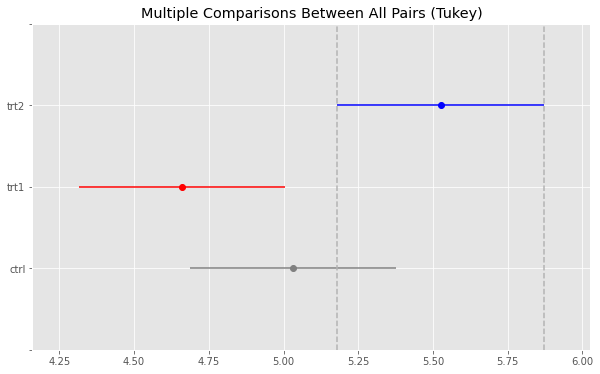

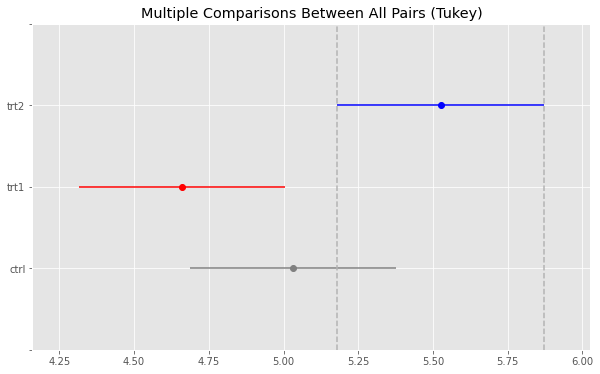

In [ ]:
tukey.plot_simultaneous(comparison_name="trt2")

**Если стоимость удобрений одинакова, в итоге я бы посоветовал удобрение trt2, он дает значительный прирост урожайности в сравнении с удобрением trt1 и хоть незначительный, но прирост в сравнение с удобрением ctrl**

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [ ]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
ab_test =data.groupby('version').mean()
ab_test

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


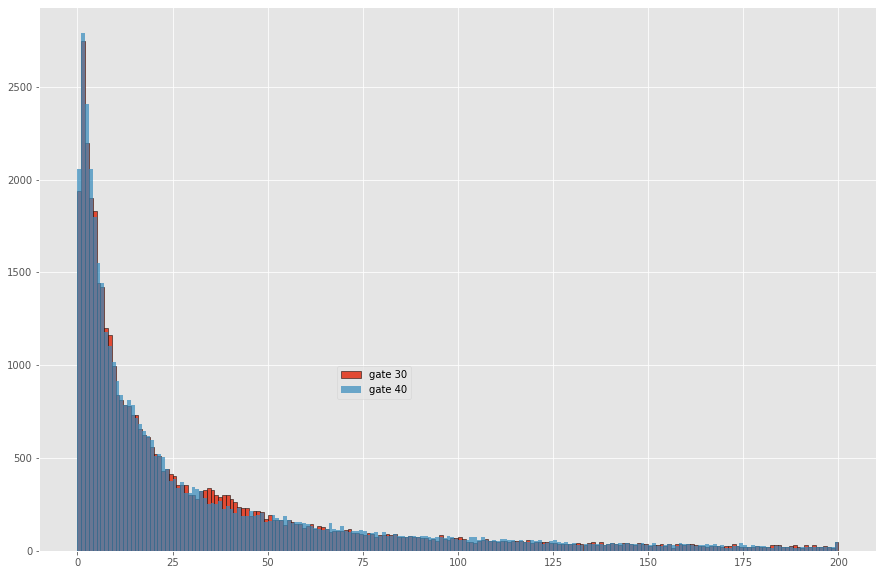

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Если ворота установлены на 30 уровне, то с ~30 дня пользования, остается больше пользователей, можем предположить, что ворота лучше ставить на 30 уровне

Судя по тесту значимомого различия между выборками нет, следовательно, можем предположить, что постановка ворот на данных уровнях не влияет на количество пользователей

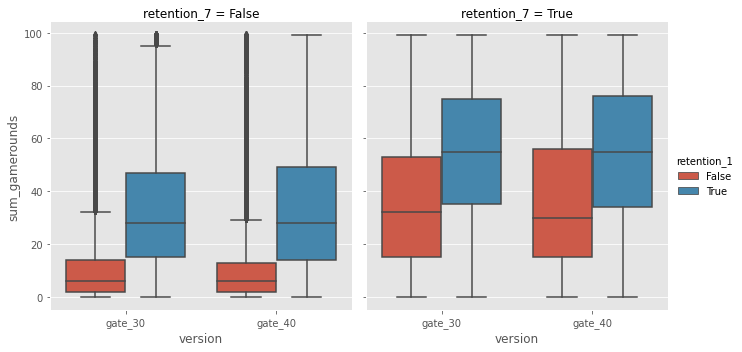

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [ ]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f, p)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

0.7939569526814368 0.3729086824696095
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [ ]:
stat, p_value = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Статистика=%.3f, p=%.3f' % (stat, p_value))
if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Ваши выводы?** 

Проведя тесты , понимаем , что возможно нужно определить другие уровни для установки ворот или добавить новые условия для открытия следующих уровней, так как данные выборки значимо не отличаются, согласно результатов теста

<Figure size 1080x720 with 0 Axes>

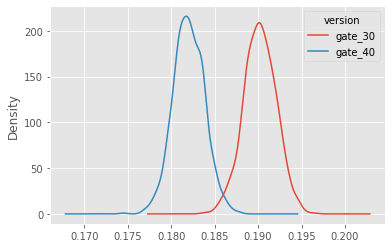

In [ ]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
t, p = stats.ttest_ind(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Статистика=%.3f, p=%.3f' % (t, p))
if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=0.891, p=0.373
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


Подготовим данные согласно условию

Отфильтруем только нужные нам классы

In [ ]:
grass_rock = pokemon.loc[(pokemon['Class 1'].isin(['Grass','Rock']))|
                         (pokemon['Class 2'].isin(['Grass','Rock']))]

Оставим только нужные столбцы

In [ ]:
grass_rock = grass_rock[['Name','Class 1','Class 2','Attack']]

Оставим только тех покемонов которые не содержат одновременно в двух классах 'Grass' и'Rock'

In [ ]:
grass_rock = grass_rock.loc[~((grass_rock['Class 1'].isin(['Grass','Rock']))&
                         (grass_rock['Class 2'].isin(['Grass','Rock'])))]

In [ ]:
grass_rock.head()

,Name,Class 1,Class 2,Attack
0,Bulbasaur,Grass,Poison,49
1,Ivysaur,Grass,Poison,62
2,Venusaur,Grass,Poison,82
3,Mega Venusaur,Grass,Poison,100
48,Oddish,Grass,Poison,50


Проверим что все сделали правильно

In [ ]:
grass_rock.where((pokemon['Class 1'].isin(['Grass','Rock']))&(pokemon['Class 2'].isin(['Grass','Rock']))).count()

Name       0
Class 1    0
Class 2    0
Attack     0
dtype: int64

Для удобства создадим колонку, где будет отображен только нужный нам класс для каждого покемона

In [ ]:
grass_rock.loc[grass_rock['Class 1'] == 'Grass', 'Class'] = 'Grass'
grass_rock.loc[grass_rock['Class 1'] == 'Rock', 'Class'] = 'Rock'
grass_rock.loc[grass_rock['Class 2'] == 'Grass', 'Class'] = 'Grass'
grass_rock.loc[grass_rock['Class 2'] == 'Rock', 'Class'] = 'Rock'

In [ ]:
grass_rock.head()

,Name,Class 1,Class 2,Attack,Class
0,Bulbasaur,Grass,Poison,49,Grass
1,Ivysaur,Grass,Poison,62,Grass
2,Venusaur,Grass,Poison,82,Grass
3,Mega Venusaur,Grass,Poison,100,Grass
48,Oddish,Grass,Poison,50,Grass


In [ ]:
class_attac = grass_rock[['Class','Attack']]

In [ ]:
class_attac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 796
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   149 non-null    object
 1   Attack  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
class_attac.head()

,Class,Attack
0,Grass,49
1,Grass,62
2,Grass,82
3,Grass,100
48,Grass,50


In [ ]:
class_gras = class_attac[class_attac['Class'] == 'Grass']

In [ ]:
class_gras.head()

,Class,Attack
0,Grass,49
1,Grass,62
2,Grass,82
3,Grass,100
48,Grass,50


In [ ]:
class_rock = class_attac[class_attac['Class'] == 'Rock']

In [ ]:
class_rock.head()

,Class,Attack
80,Rock,80
81,Rock,95
82,Rock,120
103,Rock,45
119,Rock,85


При помощи теста Стьюдента проверим, если ли различия между группами.
Уровень значимости определим в 5%

H0 Выборки не отличаются и сила аттаки у них примерно равны

H1 Выборки отличаются и сила аттаки у них разная

In [ ]:
t, p = stats.ttest_ind(class_gras['Attack'],class_rock['Attack'])
print(f'Статистика {t}, p_value {p}')
if p < 0.05:
  print('Выборки отличаются и сила аттаки у них разная')
else:
  print('Выборки не отличаются и сила аттаки у них примерно равны')


Статистика -3.729457582692065, p_value 0.00027333381459902653
Выборки отличаются и сила аттаки у них разная


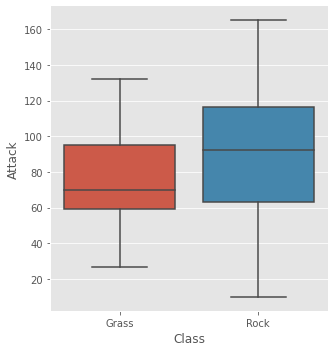

In [ ]:
sns.catplot(x ='Class', y="Attack",
            data=class_attac, kind="box",
            height=5, aspect=.95)

**По графику видно , что сила атаки у класса Rock выше **

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

Проделаем аналогичные операции из 1 задания, только с другими груммами и характеристиками

In [ ]:
water_normal = pokemon.loc[(pokemon['Class 1'].isin(['Water','Normal']))|
                         (pokemon['Class 2'].isin(['Water','Normal']))]

In [ ]:
water_normal = water_normal.loc[~((water_normal['Class 1'].isin(['Water','Normal']))&
                         (water_normal['Class 2'].isin(['Water','Normal'])))]

In [ ]:
water_normal.where((pokemon['Class 1'].isin(['Water','Normal']))&(pokemon['Class 2'].isin(['Water','Normal']))).count()

pid           0
Name          0
Class 1       0
Class 2       0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Legendary     0
sum_skill     0
mult_skill    0
dtype: int64

In [ ]:
water_normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_skill,mult_skill
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False,157,137280
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False,202,297360
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False,262,655700
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False,302,976440
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False,125,72000


In [ ]:
water_normal.loc[water_normal['Class 1'] == 'Water', 'Class'] = 'Water'
water_normal.loc[water_normal['Class 1'] == 'Normal', 'Class'] = 'Normal'
water_normal.loc[water_normal['Class 2'] == 'Water', 'Class'] = 'Water'
water_normal.loc[water_normal['Class 2'] == 'Normal', 'Class'] = 'Normal'

In [ ]:
water_normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_skill,mult_skill,Class
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False,157,137280,Water
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False,202,297360,Water
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False,262,655700,Water
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False,302,976440,Water
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False,125,72000,Normal


In [ ]:
class_speed = water_normal[['Class','Speed']]

In [ ]:
class_speed.head()

,Class,Speed
9,Water,43
10,Water,58
11,Water,78
12,Water,78
20,Normal,56


In [ ]:
class_water = class_speed[class_speed['Class'] == 'Water']

In [ ]:
class_water.head()

,Class,Speed
9,Water,43
10,Water,58
11,Water,78
12,Water,78
59,Water,55


In [ ]:
class_normal = class_speed[class_speed['Class'] == 'Normal']

In [ ]:
class_normal.head()

,Class,Speed
20,Normal,56
21,Normal,71
22,Normal,101
23,Normal,121
24,Normal,72


При помощи теста Стьюдента проверим, если ли различия между группами. Уровень значимости определим в 5%

H0 Выборки не отличаются и скорость у них примерно равна

H1 Выборки отличаются и скорость у них разная

In [ ]:
t, p = stats.ttest_ind(class_water['Speed'],class_normal['Speed'])
print(f'Статистика {t}, p_value {p}')
if p < 0.05:
  print('Выборки отличаются и скорость у них разная')
else:
  print('Выборки не отличаются и скорость у них примерно равна')

Статистика -2.150913330007121, p_value 0.03255353551391033
Выборки отличаются и скорость у них разная


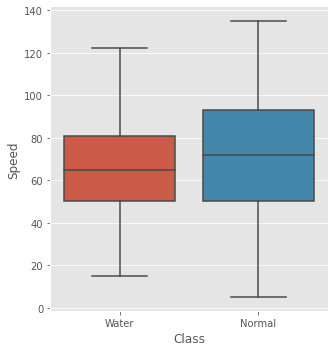

In [ ]:
sns.catplot(x ='Class', y="Speed",
            data=class_speed, kind="box",
            height=5, aspect=.95)

**Судя по графику покемы в классе Normal быстрее**

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
#см. задание 4

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

Создадим два датафрейма с покемонами которые принимали и которые не принимали сыворотку

In [ ]:
serum_pokemon = pokemon[pokemon['Name'].isin(treathed_pokemon)]

In [ ]:
serum_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
over_pokemon = pokemon[~(pokemon['Name'].isin(treathed_pokemon))]

In [ ]:
over_pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


Оставим только нужные колонки

In [ ]:
serum_pokemon = serum_pokemon[['Name','Speed']]

In [ ]:
over_pokemon = over_pokemon[['Name','Speed']]

При помощи теста Стьюдента проверим, если ли различия между группами. Уровень значимости определим в 5%

H0 Выборки не отличаются и скорость у них примерно равна

H1 Выборки отличаются и скорость у них разная

In [ ]:
t, p_value = stats.ttest_ind(serum_pokemon['Speed'],over_pokemon['Speed'])
print(f'Статистика {t}, p_value {p_value}')
if p > 0.05:
  print('Выборки не отличаются и скорость у них примерно равна')
else:
  print('Выборки отличаются и скорость у них разная')

Статистика 5.385407401082377, p_value 9.51510117630786e-08
Выборки отличаются и скорость у них разная


{'whiskers': [<matplotlib.lines.Line2D at 0x7f42ca23c2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f42ca3537d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f42cced5750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f42ca3d0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f42c9ceee50>],
 'means': []}

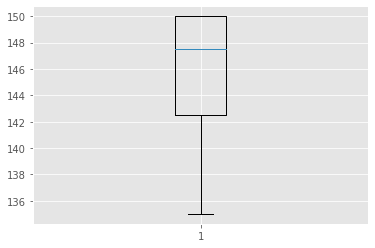

In [ ]:
plt.boxplot(serum_pokemon['Speed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f42cd14c790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f42c9c8c990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f42ccde9810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f42c9c3a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f42c9c3a9d0>],
 'means': []}

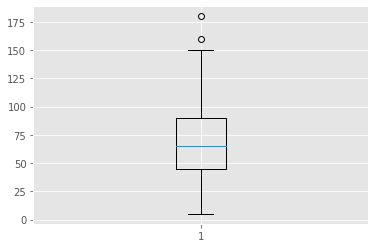

In [ ]:
plt.boxplot(over_pokemon['Speed'])

Не смотря на показанные различия теста и графика , выводы об эффективности сыворотки делать не стоит , так как слишком мало данных о покемонах принявших сыворотку(всего 4 покемона), нужно большее количество наблюдений

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon['sum_skill'] = pokemon['HP']+pokemon['Attack']+pokemon['Defense']

In [ ]:
pokemon['mult_skill'] = pokemon['HP']*pokemon['Attack']*pokemon['Defense']

In [ ]:
pokemon_legendary = pokemon[pokemon['Legendary'] == True]

In [ ]:
pokemon_legendary.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_skill,mult_skill
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000


In [ ]:
pokemon_not_legendary = pokemon[pokemon['Legendary'] == False]

In [ ]:
pokemon_not_legendary.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sum_skill,mult_skill
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [ ]:
pokemon_legendary_sum = pokemon_legendary[['Name','sum_skill','mult_skill']]

In [ ]:
pokemon_legendary_sum.head()

,Name,sum_skill,mult_skill
156,Articuno,275,765000
157,Zapdos,265,688500
158,Moltres,280,810000
162,Mewtwo,306,1049400
163,Mega Mewtwo X,396,2014000


In [ ]:
pokemon_not_legendary_sum = pokemon_not_legendary[['Name','sum_skill','mult_skill']]

In [ ]:
pokemon_not_legendary_sum.head()

,Name,sum_skill,mult_skill
0,Bulbasaur,143,108045
1,Ivysaur,185,234360
2,Venusaur,245,544480
3,Mega Venusaur,303,984000
4,Charmander,134,87204


При помощи теста Стьюдента проверим, если ли различия между группами. Уровень значимости определим в 5%

H0 Выборки не отличаются и силы равны

H1 Выборки отличаются и сила у них разная

In [ ]:
t, p_value = stats.ttest_ind(pokemon_legendary_sum['sum_skill'],
                             pokemon_not_legendary_sum['sum_skill'])
print(f'Статистика {t}, p_value {p_value}')
if p > 0.05:
  print('Выборки не отличаются и силы равны')
else:
  print('Выборки отличаются и сила у них разная')

Статистика 11.591852366462316, p_value 7.970942205722087e-29
Выборки отличаются и сила у них разная


In [ ]:
box = pokemon[['Legendary','sum_skill']]

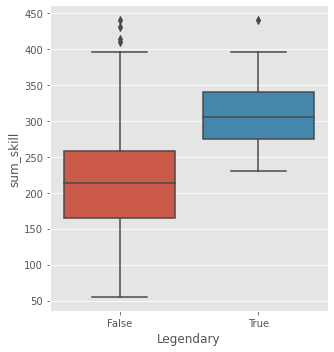

In [ ]:
sns.catplot(x ='Legendary', y="sum_skill",
            data=box, kind="box",
            height=5, aspect=.95)

Судя по графику и тесту Легендарные покемоны действительно сильнее

In [ ]:
t, p_value = stats.ttest_ind(pokemon_legendary_sum['mult_skill'],
                             pokemon_not_legendary_sum['mult_skill'])
print(f'Статистика {t}, p_value {p_value}')
if p > 0.05:
  print('Выборки не отличаются и силы равны')
else:
  print('Выборки отличаются и сила у них разная')

Статистика 13.263253408231844, p_value 1.992664308842282e-36
Выборки отличаются и сила у них разная


In [ ]:
box_ = pokemon[['Legendary','mult_skill']]

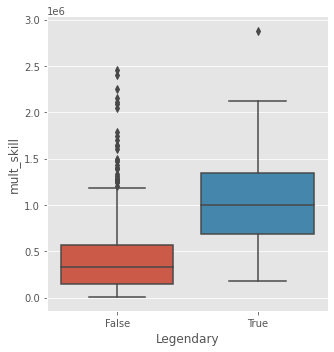

In [ ]:
sns.catplot(x ='Legendary', y="mult_skill",
            data=box_, kind="box",
            height=5, aspect=.95)

Еще раз убедились, что легендарные покемоны сильнее

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
best_defence = pokemon.loc[(pokemon['Class 1'].isin(best_defence_class))|
                         (pokemon['Class 2'].isin(best_defence_class))]

In [ ]:
best_defence = best_defence.loc[~((best_defence['Class 1'].isin(best_defence_class))&
                         (best_defence['Class 2'].isin(best_defence_class)))]

In [ ]:
best_defence.where((pokemon['Class 1'].isin(best_defence_class))&(pokemon['Class 2'].isin(best_defence_class))).count()

pid           0
Name          0
Class 1       0
Class 2       0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Legendary     0
sum_skill     0
mult_skill    0
dtype: int64

In [ ]:
best_defence = best_defence[['Class 1','Class 2','Defense']]

In [ ]:
best_defence.head()

,Class 1,Class 2,Defense
32,Ground,NaN,85
33,Ground,NaN,110
36,Poison,Ground,87
39,Poison,Ground,77
55,Ground,NaN,25


In [ ]:
best_defence.loc[best_defence['Class 1'] == 'Rock', 'Class'] = 'Rock'
best_defence.loc[best_defence['Class 1'] == 'Ground', 'Class'] = 'Ground'
best_defence.loc[best_defence['Class 1'] == 'Steel', 'Class'] = 'Steel'
best_defence.loc[best_defence['Class 1'] == 'Ice', 'Class'] = 'Ice'
best_defence.loc[best_defence['Class 2'] == 'Rock', 'Class'] = 'Rock'
best_defence.loc[best_defence['Class 2'] == 'Ground', 'Class'] = 'Ground'
best_defence.loc[best_defence['Class 2'] == 'Steel', 'Class'] = 'Steel'
best_defence.loc[best_defence['Class 2'] == 'Ice', 'Class'] = 'Ice'

In [ ]:
best_defence = best_defence[['Defense','Class']]

In [ ]:
best_defence.head()

,Defense,Class
32,85,Ground
33,110,Ground
36,87,Ground
39,77,Ground
55,25,Ground


In [ ]:
best_defence_rock = best_defence[best_defence['Class'] == 'Rock']
best_defence_ground = best_defence[best_defence['Class'] == 'Ground']
best_defence_steel = best_defence[best_defence['Class'] == 'Steel']
best_defence_ice = best_defence[best_defence['Class'] == 'Ice']

При помощи дисперсионного анализа проверим, если ли различия между группами. Уровень значимости определим в 5%

H0 Выборки не отличаются и сила защиты равна

H1 Выборки отличаются и сила защиты у них разная

In [ ]:
fvalue, pvalue = stats.f_oneway(best_defence_rock['Defense'], best_defence_ground['Defense'],
                                best_defence_steel['Defense'], best_defence_ice['Defense'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=8.820, p=0.000019
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Проведем тест Краскела-Уоллиса

H0 Выборки не отличаются и сила защиты равна

H1 Выборки отличаются и сила защиты у них разная

In [ ]:
stat, p = stats.kruskal(best_defence_rock['Defense'], best_defence_ground['Defense'],
                                best_defence_steel['Defense'], best_defence_ice['Defense'])
print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=26.683, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


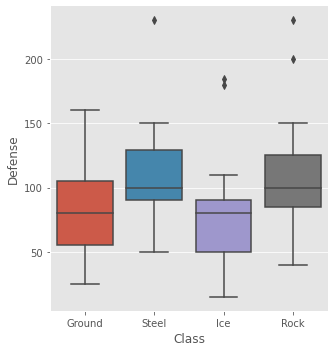

In [ ]:
sns.catplot(x ='Class', y="Defense",
            data=best_defence, kind="box",
            height=5, aspect=.95)

Судя по двум проведенным тестам и графику, профессор ошибся и сила защиты у приведенных групп различается